Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  хорошую работу, видно, что приложено много усилий
- Я оставил некоторые советы, надеюсь они будут полезными или интересными.
- Есть некоторые недочеты, которые нужно поправить, но думаю ты быстро с этим справишься
- Жду обновленную работу

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек на комментарии.
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"></h2>

Привет, ревьюер!)

</div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
RANDOM_STATE = 42

<div class="alert alert-block alert-success">
<b>Успех:</b>  Импорты на месте
</div> 

## Загрузка и подготовка данных

In [3]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv', index_col='id')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv', index_col='id')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv', index_col='id')
geo_data_0.head()

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


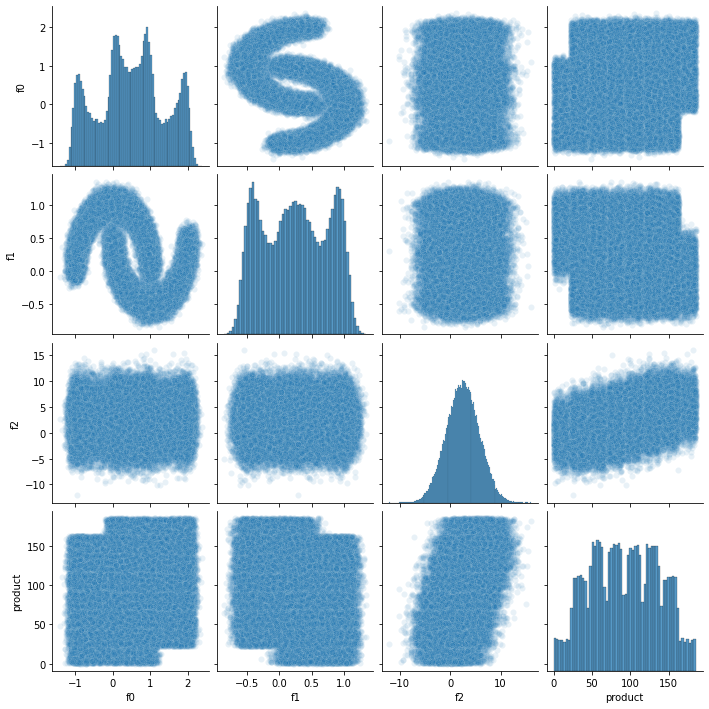

In [5]:
sns.pairplot(geo_data_0, plot_kws={'alpha': 0.1})

---

In [6]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


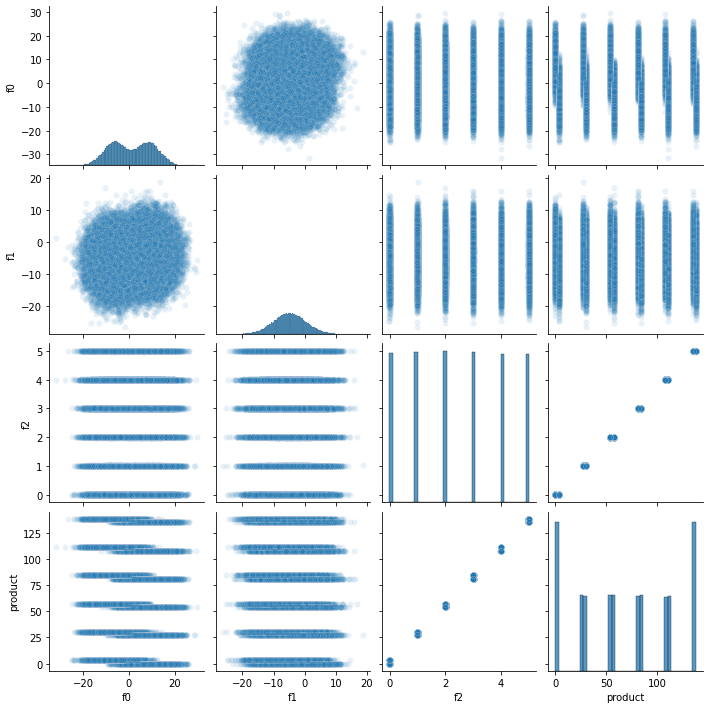

In [7]:
sns.pairplot(geo_data_1, plot_kws={'alpha': 0.1})

---

In [8]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


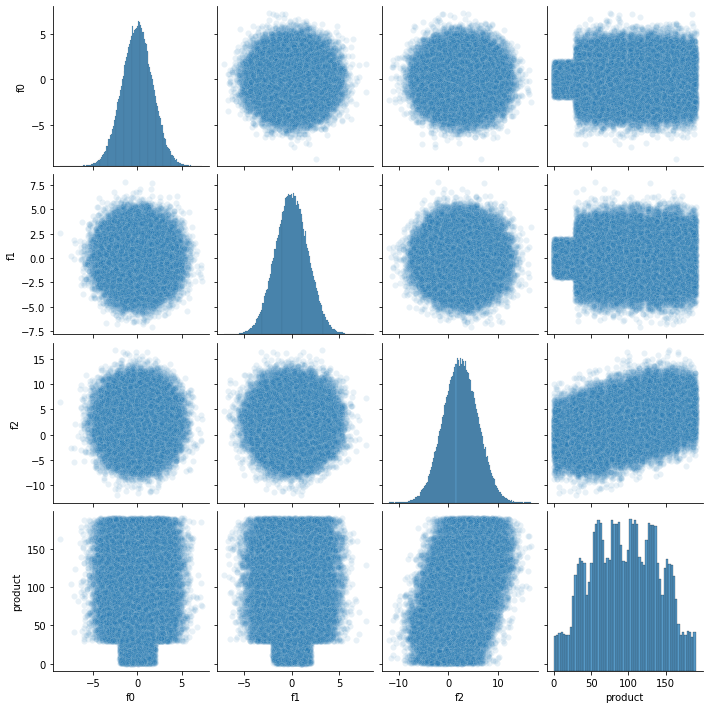

In [9]:
sns.pairplot(geo_data_2, plot_kws={'alpha': 0.1})

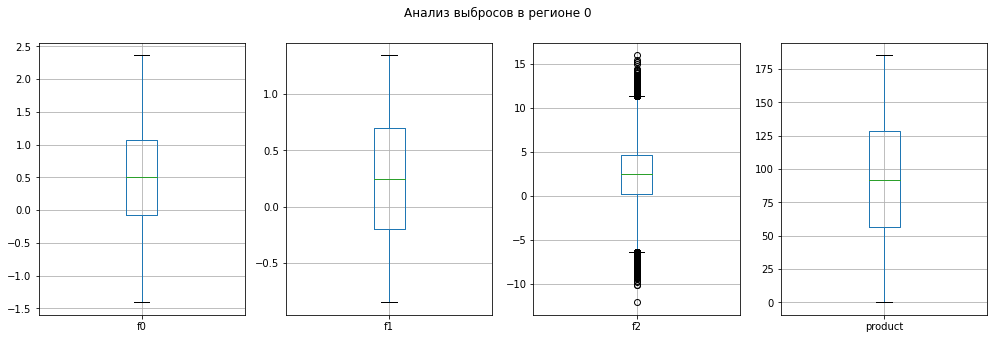

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(17, 5))

geo_data_0.boxplot('f0', ax=axes[0])
geo_data_0.boxplot('f1', ax=axes[1])
geo_data_0.boxplot('f2', ax=axes[2])
geo_data_0.boxplot('product', ax=axes[3])

fig.suptitle('Анализ выбросов в регионе 0')

plt.show()

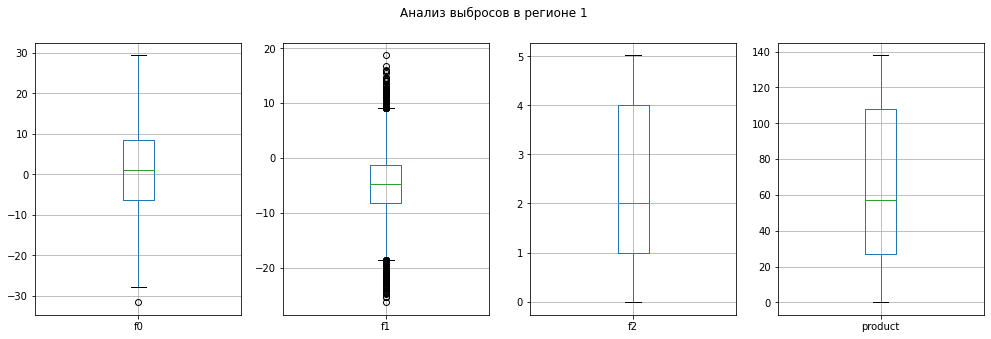

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(17, 5))

geo_data_1.boxplot('f0', ax=axes[0])
geo_data_1.boxplot('f1', ax=axes[1])
geo_data_1.boxplot('f2', ax=axes[2])
geo_data_1.boxplot('product', ax=axes[3])

fig.suptitle('Анализ выбросов в регионе 1')

plt.show()

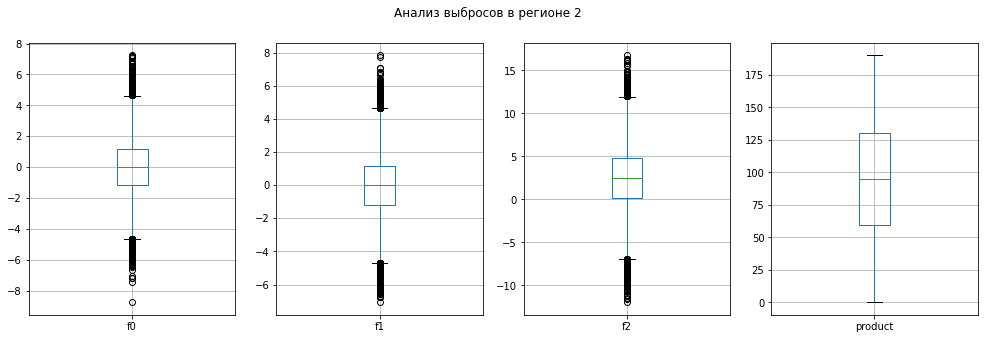

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(17, 5))

geo_data_2.boxplot('f0', ax=axes[0])
geo_data_2.boxplot('f1', ax=axes[1])
geo_data_2.boxplot('f2', ax=axes[2])
geo_data_2.boxplot('product', ax=axes[3])

fig.suptitle('Анализ выбросов в регионе 2')

plt.show()

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"></h2>

Стоит ли здесь отбрасывать выбросы и масштабировать признаки?

</div>

<div class="alert alert-block alert-warning">
<b>Ответ:</b> Данные масштабировать для линейных моделей можно всегда, но в данном случае разницы не будет, потому что факторы расположены в близком масштабе. А выбросы удалять я бы не стал, потому что природа факторов до конца не известна. Перед тем как их удалять, нужно быть полностью уверенным, что это аномалии.
     
  
</div>



<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены хорошо, но можно было бы еще как минимум изучить  корреляции, так как  дальше используются линейные модели
     
  
</div>
<div class="alert alert-block alert-warning">
<b>Совет </b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
    
</div>


<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"></h2>

Спасибо. С sweetviz ознакомлюсь. Не знал, что уже можно использовать pandas_profiling.

</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Во время обучения я бы не злоупотреблял, но знать про них было бы не лишним.
</div>


## Обучение и проверка модели

In [13]:
X_0 = geo_data_0.drop('product', axis=1)
y_0 = geo_data_0['product']

In [14]:
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(
    X_0, y_0,
    random_state=RANDOM_STATE,
)

In [15]:
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)
y_pred_0 = model_0.predict(X_valid_0)
y_pred_0 = pd.Series(y_pred_0, index=X_valid_0.index)
print(f'Средний запас предсказанного сырья {y_pred_0.mean()}')
mse = mean_squared_error(y_valid_0, y_pred_0)
print(f'RMSE {mse ** 0.5}')

Средний запас предсказанного сырья 92.39879990657768
RMSE 37.75660035026169


---

In [16]:
X_1 = geo_data_1.drop('product', axis=1)
y_1 = geo_data_1['product']

In [17]:
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(
    X_1, y_1,
    random_state=RANDOM_STATE,
)

In [18]:
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_valid_1)
y_pred_1 = pd.Series(y_pred_1, index=X_valid_1.index)
print(f'Средний запас предсказанного сырья {y_pred_1.mean()}')
mse = mean_squared_error(y_valid_1, y_pred_1)
print(f'RMSE {mse ** 0.5}')

Средний запас предсказанного сырья 68.71287803913762
RMSE 0.890280100102884


---

In [19]:
X_2 = geo_data_2.drop('product', axis=1)
y_2 = geo_data_2['product']

In [20]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(
    X_2, y_2,
    random_state=RANDOM_STATE,
)

In [21]:
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_valid_2)
y_pred_2 = pd.Series(y_pred_2, index=X_valid_2.index)
print(f'Средний запас предсказанного сырья {y_pred_2.mean()}')
mse = mean_squared_error(y_valid_2, y_pred_2)
print(f'RMSE {mse ** 0.5}')

Средний запас предсказанного сырья 94.77102387765939
RMSE 40.145872311342174


Да будто предсказания не плохи: mean очень схож с действительным, std тоже ...

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан хорошо, все метрики считаются корректно
</div> <div class="alert alert-block alert-warning">
<b>Совет:</b> Можно было бы использовать циклы/функции и избежать дублирования кода
</div> 

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"></h2>

Ты абсолютно прав, только я спешу приступить к выполнению сборного проекта 2. Дедлайн в субботу :(  
так вышло, что затянул
    
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Понял)
</div>


## Подготовка к расчёту прибыли

In [22]:
BUDGET = 10_000_000_000  # бюджет, выделенный на разработку скважин
PRICE = 450_000  # доход за продажу с единицы продукта
N = 200  # количество скважин для разработки

n = (BUDGET / N) / PRICE
print(f'Достаточный объём сырья для безубыточной разработки новой скважины {n}.')

Достаточный объём сырья для безубыточной разработки новой скважины 111.11111111111111.


<div class="alert alert-block alert-success">
<b>Успех:</b> лайк за константы в верхнем регистре
  
</div>


In [23]:
print(f'Средний запас сырья скважинах региона 0: {geo_data_0["product"].mean()}')
print(f'Средний запас сырья скважинах региона 1: {geo_data_1["product"].mean()}')
print(f'Средний запас сырья скважинах региона 2: {geo_data_2["product"].mean()}')

Средний запас сырья скважинах региона 0: 92.50000000000001
Средний запас сырья скважинах региона 1: 68.82500000000002
Средний запас сырья скважинах региона 2: 95.00000000000004


Да, случайным образом выбирать скважины точно нельзя)

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен
  
</div>


## Расчёт прибыли и рисков 

In [24]:
def profit(y_true, y_pred, count):
    y_pred = pd.Series(y_pred)
    y_true = pd.Series(y_true)
    sorted_pred = y_pred.sort_values(ascending=False)
    selected_true = y_true[sorted_pred.index][:count]

    return selected_true.sum() * PRICE - BUDGET

<div class="alert alert-block alert-danger">
    
<b>Ошибка:</b> `Прибыль = выручка - расходы`. А у тебя здесь только выручка
    
   
</div>

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"></h2>

Действительно. Исправил
    
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Теперь верно
</div>


In [25]:
SUBSAMPLE_NUM = 1000  # количество подвыборок
SUBSAMPLE_SIZE = 500  # размер подвыборки
CHOICE_NUM = 200  # количество выбранных для разработки месторождений

state = np.random.RandomState(RANDOM_STATE)


def get_profits(y_valid, y_pred):
    profits = []
    for i in range(SUBSAMPLE_NUM):
        y_valid_subsample = y_valid.sample(n=SUBSAMPLE_SIZE, replace=True, random_state=state)
        y_pred_subsample = y_pred[y_valid_subsample.index]

        profits.append(profit(y_valid_subsample, y_pred_subsample, CHOICE_NUM))
    
    return pd.Series(profits)

<div class="alert alert-block alert-success">
<b>Успех:</b> С реализацией бутстрапа все в порядке
</div>


In [26]:
profits_0 = get_profits(y_valid_0, y_pred_0)
profits_1 = get_profits(y_valid_1, y_pred_1)
profits_2 = get_profits(y_valid_2, y_pred_2)

In [27]:
mean_profit_0 = profits_0.mean()
mean_profit_1 = profits_1.mean()
mean_profit_2 = profits_2.mean()
print(f'Средняя прибыль в регионе 0 {round(mean_profit_0, 2)} рублей (~{round(mean_profit_0 / 1e6, 2)}) миллионов рублей.')
print(f'Средняя прибыль в регионе 1 {round(mean_profit_1, 2)} рублей (~{round(mean_profit_1 / 1e6, 2)}) миллионов рублей.')
print(f'Средняя прибыль в регионе 2 {round(mean_profit_2, 2)} рублей (~{round(mean_profit_2 / 1e6, 2)}) миллионов рублей.')

Средняя прибыль в регионе 0 427847560.46 рублей (~427.85) миллионов рублей.
Средняя прибыль в регионе 1 511530218.15 рублей (~511.53) миллионов рублей.
Средняя прибыль в регионе 2 408545681.21 рублей (~408.55) миллионов рублей.


Здорово! В среднем в каждом регионе мы можем получить прибыль. Взглянем на доверительные интервалы.

In [28]:
print(f'95% доверительный интервал для региона 0: ({profits_0.quantile(0.025):.2f}, {profits_0.quantile(0.975):.2f})\n'
      f'95% доверительный интервал для региона 1: ({profits_1.quantile(0.025):.2f}, {profits_1.quantile(0.975):.2f})\n'
      f'95% доверительный интервал для региона 2: ({profits_2.quantile(0.025):.2f}, {profits_2.quantile(0.975):.2f})')

95% доверительный интервал для региона 0: (-97249829.57, 954215192.71)
95% доверительный интервал для региона 1: (91700564.14, 921455668.33)
95% доверительный интервал для региона 2: (-120624872.94, 960859440.73)


<div class="alert alert-block alert-success">
<b>Успех:</b> Дов.интервал считается верным образом
</div>


Ага, только для региона 1 в доверительный интервал попадают только доходные суммы.

In [29]:
print(f'Риск убытков в регионе 0: {(profits_0 < 0).mean():.2%}\n'
      f'Риск убытков в регионе 1: {(profits_1 < 0).mean():.2%}\n'
      f'Риск убытков в регионе 2: {(profits_2 < 0).mean():.2%}')

Риск убытков в регионе 0: 5.50%
Риск убытков в регионе 1: 0.60%
Риск убытков в регионе 2: 7.50%



<div class="alert alert-block alert-warning">
<b>Совет </b>  После исправления функции прибыли, не забудь обновить расчет рисков.
    
</div>


По риску убытков у региона 1 тоже самый низкий показатель. Я бы выбрал его!


<div class="alert alert-block alert-warning">
<b>Совет </b>  И не забудь обновить вывод, если потребуется) .
    
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть контакт, проведено детальное исследование и был вбыран правильный регион!
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован